# Taller de Regresión Lineal Orientado al Negocio

Este taller se centra en **cómo** un negocio (por ejemplo, un e-commerce) puede **interpretar** y **aprovechar** los resultados de la Regresión Lineal para **tomar decisiones**.

## Contexto de Negocio
Imagina que eres el/la **gerente de marketing** de una tienda en línea. Tienes un conjunto de datos con el comportamiento de los clientes y la **cantidad anual** que han gastado (`Yearly Amount Spent`). Tu objetivo es:
1. **Identificar** qué factores (tiempo en la app, duración de la sesión, etc.) influyen más en el gasto anual.
2. **Predecir** el gasto anual futuro de los clientes.
3. Traducir estos hallazgos en **acciones concretas** que aumenten el gasto de los clientes.

## Datos Disponibles
Se te proporciona un dataset con las columnas:
- **Email**
- **Address**
- **Avatar**
- **Avg. Session Length** (Promedio de duración de la sesión)
- **Time on App** (Tiempo en la App)
- **Time on Website** (Tiempo en el Sitio Web)
- **Length of Membership** (Antigüedad de membresía, en años)
- **Yearly Amount Spent** (Cantidad gastada anualmente)

Tu variable objetivo para predecir es: **Yearly Amount Spent**.

## 1. Carga y Exploración de Datos

### Tarea 1.1: Cargar los datos
1. Crea un DataFrame (por ejemplo, `df`) leyendo el archivo CSV o introduciendo manualmente la tabla que se te proporcionó.
2. Muestra las primeras 5 filas (`df.head()`), la forma (`df.shape`) y los tipos de datos (`df.info()`).

**Pregunta de enfoque de negocio:**
- ¿Qué **insights** iniciales obtienes con solo ver las variables? ¿Cómo podría eso impactar tus **estrategias de marketing**?

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv

--2025-03-03 12:23:33--  https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv [following]
--2025-03-03 12:23:33--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87360 (85K) [text/plain]
Saving to: ‘Ecommerce _Customers.csv’

Ecommerce _Customer 100%[===================>]  85.31K  --.-KB/s    in 0.02s   

2025-03-03 12:23:34 (3.40 MB/s) - ‘Eco

In [2]:
# EJEMPLO de código:
import pandas as pd

# Supongamos que has guardado tu dataset en un archivo 'data.csv'
df = pd.read_csv('Ecommerce _Customers.csv')
df.head()



,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Tarea 1.2: Análisis Exploratorio (EDA) Básico
1. Ejecuta `df.describe()` para revisar las estadísticas descriptivas de las variables numéricas.
2. Realiza uno o dos **boxplots** o **histogramas** para visualizar la distribución de:
   - **Avg. Session Length**
   - **Time on App**
   - **Time on Website**
   - **Length of Membership**
   - **Yearly Amount Spent**

**Preguntas de negocio:**
1. Si detectas que, por ejemplo, la gente con **mayor** `Length of Membership` gasta más, ¿qué **estrategias** implementarías para retener y "graduar" a los nuevos clientes a miembros más "antiguos"?
2. Si notas que el **Time on Website** es muy bajo vs. **Time on App**, ¿implica que debas mejorar la experiencia en el sitio web para que la gente pase más tiempo allí?

In [4]:
import pandas as pd

# Leer el dataset
df = pd.read_csv("Ecommerce _Customers.csv")

# Mostrar estadísticas descriptivas
print(df.describe())


       Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462  


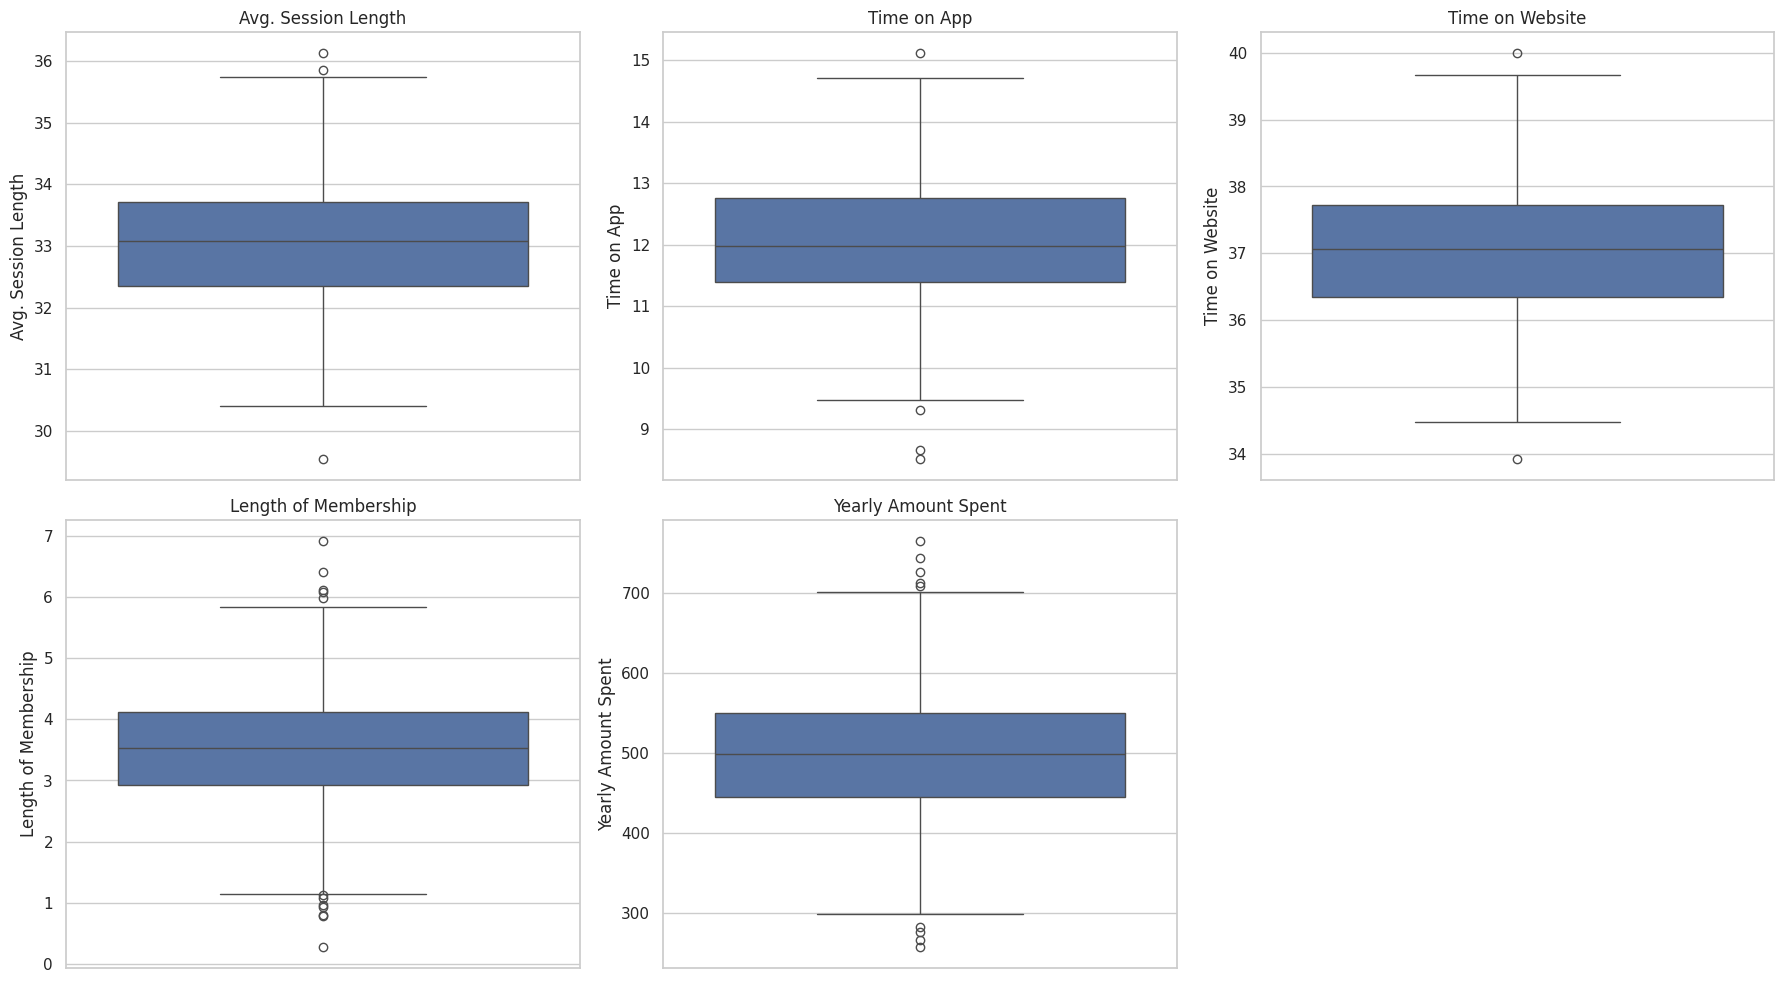

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 10)

# Crear una figura con subplots para cada variable
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Boxplot para Avg. Session Length
sns.boxplot(y=df['Avg. Session Length'], ax=axs[0, 0])
axs[0, 0].set_title('Avg. Session Length')

# Boxplot para Time on App
sns.boxplot(y=df['Time on App'], ax=axs[0, 1])
axs[0, 1].set_title('Time on App')

# Boxplot para Time on Website
sns.boxplot(y=df['Time on Website'], ax=axs[0, 2])
axs[0, 2].set_title('Time on Website')

# Boxplot para Length of Membership
sns.boxplot(y=df['Length of Membership'], ax=axs[1, 0])
axs[1, 0].set_title('Length of Membership')

# Boxplot para Yearly Amount Spent
sns.boxplot(y=df['Yearly Amount Spent'], ax=axs[1, 1])
axs[1, 1].set_title('Yearly Amount Spent')

# Eliminar el subplot vacío
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


# Implementaría estrategias para incentivar la fidelización y el aumento del tiempo de membresía:
# 1. Programas de lealtad con recompensas progresivas: descuentos, acceso exclusivo, envíos prioritarios.  Las recompensas deberían aumentar con el tiempo de membresía.
# 2.  Beneficios exclusivos por tiempo de membresía:  Ofertas especiales, eventos VIP.
# 3.  Recomendaciones personalizadas basadas en el tiempo de membresía y en el historial de compras.
# 4.  Comunicación proactiva con los clientes nuevos, ofreciéndoles un plan de "graduación" con metas y beneficios.
# 5.  Educación y capacitación en el uso de la plataforma o los productos, para aumentar el valor percibido y la satisfacción.
# 6.  Incentivos para referir nuevos clientes:  Recompensas para ambos, el cliente que refiere y el nuevo cliente.

# Si notas que el Time on Website es muy bajo vs. Time on App, ¿implica que debas mejorar la experiencia en el sitio web para que la gente pase más tiempo allí?
# No necesariamente implica que debas mejorar la experiencia del sitio web para que la gente pase más tiempo allí.  

# Posibles acciones:
# 1. Análisis A/B: probar diferentes diseños y funcionalidades en el sitio web para medir su impacto.
# 2. Optimización para dispositivos móviles:  asegurar que el sitio web sea responsive y fácil de usar en dispositivos móviles.
# 3.  Mejoras en UX/UI: simplificar el proceso de compra, mejorar la navegación, añadir contenido relevante.
# 4. Comparación de funcionalidades: si la app tiene funcionalidades que el sitio web no ofrece, se debe evaluar si implementarlas en el sitio web, teniendo en cuenta el ROI.
# 5.  Análisis de datos demográficos:  si el bajo Time on Website se centra en un grupo demográfico específico, se pueden personalizar las experiencias para ellos en el sitio web.
# 6.  Investigación de usuarios: realizar encuestas y entrevistas para entender por qué los usuarios prefieren la app y qué mejoras podrían motivarlos a usar más el sitio web.


## 2. Selección de Variables
En este dataset, algunas columnas como **Email**, **Address** o **Avatar** no son útiles directamente para el modelo de regresión.

### Tarea 2.1: Elegir features
- Usarás como variables predictoras (features) las siguientes columnas:
  1. **Avg. Session Length**
  2. **Time on App**
  3. **Time on Website**
  4. **Length of Membership**
- La columna objetivo (target) será **Yearly Amount Spent**.

**Pregunta de negocio**:
- ¿Por qué estas columnas tienen sentido para **explicar** el gasto anual? (Piensa en la lógica, "mientras más tiempo en app, más oportunidades de compra").

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargar el dataset
df = pd.read_csv("Ecommerce _Customers.csv")

# Seleccionar las variables predictoras (features) y la variable objetivo (target)
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
target = 'Yearly Amount Spent'

X = df[features]
y = df[target]

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal
lm = LinearRegression()
lm.fit(X_train, y_train)

# Realizar predicciones
y_pred = lm.predict(X_test)

# Evaluar el modelo (por ejemplo, con el R2 score y MSE)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 109.8637411839399
R2 Score: 0.9778130629184127


Las columnas 'Avg. Session Length', 'Time on App', 'Time on Website', y 'Length of Membership' tienen sentido para explicar el gasto anual debido a la correlación lógica entre el tiempo dedicado a la interacción con la empresa y la probabilidad de realizar una compra.  A continuación, una explicación para cada variable:

* **Avg. Session Length (Duración promedio de la sesión):**  Una sesión más larga generalmente indica un mayor interés del cliente en los productos o servicios.  Cuanto más tiempo explora un cliente, más probabilidades hay de que encuentre algo que desee comprar.  Sesiones más largas pueden indicar una mejor experiencia del usuario o un mayor engagement con el contenido, lo cual aumenta la posibilidad de una compra.


* **Time on App (Tiempo en la aplicación):**  Un tiempo considerable en la app sugiere una mayor exposición a los productos y ofertas. Una app bien diseñada puede facilitar la navegación, la compra y la comparación de productos, aumentando la probabilidad de una compra impulsiva o planeada.

* **Time on Website (Tiempo en el sitio web):** Similar al tiempo en la aplicación, el tiempo en el sitio web refleja el interés del cliente en la oferta. Un tiempo extenso en el sitio web puede sugerir que el cliente está investigando, comparando y considerando las opciones disponibles, lo que aumenta la probabilidad de una compra.


* **Length of Membership (Duración de la membresía):**  Clientes con mayor antigüedad probablemente sean más leales y estén más familiarizados con la empresa y sus productos. La fidelización conlleva mayor confianza y frecuencia de compra, lo que, a su vez, implica un gasto anual superior.  Clientes antiguos también pueden ser más propensos a compras de mayor valor.

## 3. Dividir el Dataset en Entrenamiento y Prueba
Para evaluar la capacidad de nuestro modelo de generalizar, dividiremos los datos en **train (80%)** y **test (20%)**.

**Pregunta de negocio**:
- ¿Cómo explicarías, en términos empresariales, que "apartamos" datos para prueba y no los usamos en el entrenamiento? ¿Qué importancia tiene para "predecir" clientes futuros?

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("Ecommerce _Customers.csv")

# Seleccionar las variables predictoras (features) y la variable objetivo (target)
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
target = 'Yearly Amount Spent'
X = df[features]
y = df[target]

# Dividir los datos en conjuntos de entrenamiento y prueba:
# Train (80%) y Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos para verificar la división
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

# Crear y entrenar el modelo de Regresión Lineal con el conjunto de entrenamiento
lm = LinearRegression()
lm.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = lm.predict(X_test)

# Evaluar el modelo: Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Dimensiones de X_train: (400, 4)
Dimensiones de X_test: (100, 4)
Dimensiones de y_train: (400,)
Dimensiones de y_test: (100,)
Mean Squared Error: 109.8637411839399
R^2 Score: 0.9778130629184127


¿Cómo explicarías, en términos empresariales, que "apartamos" datos para prueba y no los usamos en el entrenamiento? ¿Qué importancia tiene para "predecir" clientes futuros?

En términos empresariales, reservar una porción de los datos (en este caso, el 20% como conjunto de prueba) para evaluar el modelo, en lugar de usarlo para entrenar, es como realizar una **prueba de campo** antes de lanzar un nuevo producto o campaña de marketing.

**Analogía:** Imaginemos que desarrollamos una nueva estrategia de marketing basada en los datos históricos de compras. En vez de aplicar inmediatamente la estrategia a todos nuestros clientes (usando todos los datos), primero la probamos con un grupo pequeño (datos de prueba).  Observamos su efectividad en este grupo antes de implementarla a gran escala.

**Importancia para predecir clientes futuros:**

* **Evaluación Objetiva:** Usar un conjunto de datos separado para la prueba asegura una evaluación imparcial del modelo.  Si usáramos los mismos datos para entrenar y evaluar, el modelo podría parecer perfecto, pero en realidad solo estaría "memorizando" los datos de entrenamiento, sin capacidad de generalizar a nuevos clientes. La prueba nos da una medida de qué tan bien funciona el modelo con datos que *nunca* ha visto antes.

* **Prevención del Sobreajuste (Overfitting):** El modelo podría aprender patrones muy específicos de los datos de entrenamiento que no son representativos de la realidad o de nuevos clientes.  La prueba nos ayuda a detectar este *sobreajuste* y ajustar el modelo para que funcione mejor con datos nuevos, evitando así resultados engañosos.

* **Simulación de Escenarios Reales:** El conjunto de prueba representa la realidad, con clientes potenciales futuros que no están incluidos en los datos de entrenamiento.  Su desempeño en la prueba nos da una idea realista de cómo se comportará el modelo con clientes nuevos, y nos permite optimizar la estrategia de marketing en consecuencia.


## 4. Entrenar el Modelo de Regresión Lineal
1. **Crea** un objeto `LinearRegression()`.
2. **Entrena** el modelo con los datos de entrenamiento.
3. **Obtén** el intercepto y los coeficientes resultantes.

**Pregunta de negocio**:
- Si el coeficiente de `Time on App` es grande y positivo, ¿cómo podrías usar esta información para crear **campañas** o **mejoras** en la aplicación que incentiven al usuario a pasar más tiempo allí?

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargar el dataset
df = pd.read_csv("Ecommerce _Customers.csv")

# Seleccionar las variables predictoras (features) y la variable objetivo (target)
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
target = 'Yearly Amount Spent'
X = df[features]
y = df[target]

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el objeto de Regresión Lineal
lm = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lm.fit(X_train, y_train)

# Obtener el intercepto y los coeficientes resultantes
intercept = lm.intercept_
coefficients = lm.coef_

print("Intercepto:", intercept)
print("Coeficientes:", coefficients)

# Para visualizar qué coeficiente corresponde a cada feature:
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print(coef_df)

Intercepto: -1044.2574146365582
Coeficientes: [25.5962591  38.78534598  0.31038593 61.89682859]
                Feature  Coefficient
0   Avg. Session Length    25.596259
1           Time on App    38.785346
2       Time on Website     0.310386
3  Length of Membership    61.896829


Si el coeficiente de 'Time on App' es grande y positivo, significa que por cada unidad de aumento en el tiempo que un usuario pasa en la aplicación, su gasto anual aumenta significativamente.  Podemos usar esta información para crear campañas y mejoras en la aplicación que incentiven a los usuarios a pasar más tiempo allí.

# 1. Notificaciones y recordatorios personalizados:
#    - Enviar notificaciones push o correos electrónicos personalizados que recuerden a los usuarios sobre productos que han visto recientemente, ofertas especiales o productos que podrían interesarles según su historial de navegación.
#    - Implementar recordatorios en la aplicación para productos en su carrito de compras o artículos guardados.
# 2. Gamificación:
#    - Introducir elementos de gamificación en la aplicación, como puntos de recompensa, insignias o niveles que se otorgan por el tiempo de uso, las compras o la participación en actividades dentro de la app.
#    - Mostrar un progreso visual al usuario (barra de progreso, niveles) para incentivar a alcanzar metas de tiempo en la app.
# 3. Contenido exclusivo y personalizado:
#    - Ofrecer contenido exclusivo (descuentos especiales, acceso anticipado a productos, contenido multimedia) a los usuarios que pasan una cantidad significativa de tiempo en la app.
#    - Mostrar recomendaciones más personalizadas en función del historial de navegación y el tiempo dedicado a la app.
# 4. Mejoras en la interfaz de usuario y experiencia del usuario:
#    - Simplificar la navegación y facilitar la búsqueda para que los usuarios encuentren fácilmente lo que buscan.
#    - Mejorar la calidad y la cantidad de contenido disponible dentro de la aplicación para que los usuarios tengan más cosas que explorar y descubrir.
#    - Implementar un sistema de chat en vivo o de soporte al cliente dentro de la aplicación para que los usuarios puedan obtener ayuda rápidamente.
# 5. Descuentos o promociones exclusivos:
#    - Ofrecer descuentos o promociones especiales a los usuarios que pasan una cierta cantidad de tiempo en la aplicación cada día o semana.
#    - Implementar "compras flash" o ofertas por tiempo limitado dentro de la aplicación.
# 6. Recompensas por el tiempo:
#   - Implementar un sistema de recompensas progresivas para el tiempo en la app.
#   - Por ejemplo, después de 10 minutos diarios, se desbloquea una funcionalidad, un descuento o un cupón.
# 7. Eventos en la aplicación:
#   - Organizar eventos o concursos dentro de la app que requieran tiempo para participar.
#   - Los usuarios que participen ganan premios o descuentos especiales.
# 8. Integraciones con Redes Sociales:
#   - Incentivar el intercambio de contenido o el registro desde redes sociales.

## 5. Evaluación del Modelo
1. **Predice** en el conjunto de prueba.
2. Calcula las **métricas** MSE, MAE y R² para verificar la calidad de tu modelo. No profundizaremos en residuos, solo en la idea de si el modelo "le atina" al gasto anual.

**Preguntas de negocio**:
1. ¿Qué interpretas si **R²** es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?
2. Si el **MAE** es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?

In [16]:
from sklearn.metrics import mean_absolute_error

y_pred = lm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 109.8637411839399
Mean Absolute Error (MAE): 8.558441885315231
R-squared (R2): 0.9778130629184127


¿Qué interpretas si R² es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?
# Un R² de 0.80 o 0.90 indica que el modelo explica el 80% o 90% de la variabilidad en el gasto anual de los clientes.  Esto sugiere un buen ajuste del modelo a los datos. Sin embargo, si el objetivo es una predicción extremadamente precisa para tomar decisiones cruciales, se podría buscar mejorar el modelo o considerar variables adicionales.  La "bondad" del modelo depende de los objetivos específicos.  Un R² de 0.80 puede ser excelente en un contexto, pero insuficiente en otro donde se requiera una predicción muy precisa.


# Si el MAE es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?
# Un MAE de 15 USD significa que, en promedio, las predicciones del modelo difieren del gasto real en 15 USD.  Para determinar si es aceptable, necesitamos contexto:

# * Gasto promedio de los clientes: Si el gasto anual promedio es de 500 USD, un MAE de 15 USD representa un error del 3%, lo cual podría ser aceptable.  
# * Impacto en la toma de decisiones:  Si el negocio está utilizando el modelo para decisiones de marketing o promociones, donde la precisión es crucial, un MAE de 15 USD podría ser demasiado alto.  Por ejemplo, si el valor de vida del cliente (CLV) es bajo, o si se usa para dirigir campañas muy específicas, 15 USD podría ser significativo.
# * Costo de la imprecisión: Considerar las consecuencias de una predicción errónea. Si la sobreestimación lleva a una oferta demasiado generosa, o si la subestimación resulta en una oportunidad perdida con un cliente de alto valor, el impacto de un MAE de 15 USD podría ser crucial.
# * Otros aspectos del negocio: Se deben considerar las estrategias de marketing, los rangos de precios de los productos, el perfil promedio de los clientes y el mercado.
# * Comparación con otros modelos: Se debe evaluar si este error es mejor o peor que lo alcanzado con otros modelos.



## 6. Interpretación y Aplicación Práctica
1. **Observa** los coeficientes resultantes: ¿qué variable es la más influyente? ¿Cómo impacta eso en tu estrategia de negocios?
2. **Propuestas** de acción:
   - Si `Time on App` es el que más incide, podrías **invertir** más en mejoras de la app.
   - Si `Length of Membership` está ligado a más gasto, podrías **fidelizar** a los nuevos clientes con promociones.

**Preguntas de negocio**:
1. ¿Cómo comunicarías estos resultados a un equipo directivo que no maneja detalles estadísticos?
2. ¿Qué **acciones concretas** aplicarías para aumentar el gasto anual de los clientes, basándote en los coeficientes del modelo?

In [17]:
print(coef_df)

# Identifica la variable más influyente
most_influential_variable = coef_df.loc[coef_df['Coefficient'].abs().idxmax(), 'Feature']
print(f"\nLa variable más influyente es: {most_influential_variable}")

# Propuesta de acción basada en la variable más influyente
if most_influential_variable == 'Time on App':
  print("\nEstrategia recomendada: Invertir más en mejoras de la app para aumentar el tiempo de uso.")
elif most_influential_variable == 'Length of Membership':
  print("\nEstrategia recomendada: Fidelizar a los nuevos clientes con promociones para aumentar la duración de la membresía.")
elif most_influential_variable == 'Avg. Session Length':
    print("\nEstrategia recomendada: Mejorar la experiencia de usuario para alargar las sesiones.")
elif most_influential_variable == 'Time on Website':
    print("\nEstrategia recomendada: Optimizar el sitio web para mejorar el tiempo que los usuarios pasan en él.")
else:
  print("\nNo se pudo identificar una estrategia clara.")


# Cómo comunicar estos resultados a un equipo directivo que no maneja detalles estadísticos
print("\nComunicación para equipo directivo:")
print(f"Hemos analizado el comportamiento de compra de nuestros clientes y hemos identificado que el tiempo que pasan en la {most_influential_variable} es un factor clave para determinar cuánto gastan en nuestro negocio.  Por cada unidad de aumento en el tiempo de uso de la {most_influential_variable}, se observa un aumento significativo en el gasto anual.")


# Acciones concretas para aumentar el gasto anual de los clientes
print("\nAcciones concretas:")

if most_influential_variable == 'Time on App':
    print("- Implementar notificaciones push personalizadas.")
    print("- Mejorar la experiencia de usuario en la aplicación.")

elif most_influential_variable == 'Length of Membership':
    print("- Ofrecer promociones especiales a los nuevos clientes.")
    print("- Implementar un programa de fidelización.")

elif most_influential_variable == 'Avg. Session Length':
    print("- Implementar un chat en vivo en el sitio web para una mejor atención al cliente.")
    print("- Optimizar la velocidad de carga de las páginas.")

elif most_influential_variable == 'Time on Website':
    print("- Mejorar el diseño del sitio web para que sea mas intuitivo.")
    print("- Ofrecer contenido de calidad y relevante.")


                Feature  Coefficient
0   Avg. Session Length    25.596259
1           Time on App    38.785346
2       Time on Website     0.310386
3  Length of Membership    61.896829

La variable más influyente es: Length of Membership

Estrategia recomendada: Fidelizar a los nuevos clientes con promociones para aumentar la duración de la membresía.

Comunicación para equipo directivo:
Hemos analizado el comportamiento de compra de nuestros clientes y hemos identificado que el tiempo que pasan en la Length of Membership es un factor clave para determinar cuánto gastan en nuestro negocio.  Por cada unidad de aumento en el tiempo de uso de la Length of Membership, se observa un aumento significativo en el gasto anual.

Acciones concretas:
- Ofrecer promociones especiales a los nuevos clientes.
- Implementar un programa de fidelización.


## 7. Conclusión: Caso de Negocio Real
1. Redacta un breve **informe** o explicación final que responda:
   - ¿Qué **variables** explican mejor el gasto anual?
   - ¿Qué recomendaciones propones para aumentar el **Yearly Amount Spent**?
2. **Limitaciones**: Menciona cualquier aspecto que el modelo no cubra (datos no considerados, linealidad asumida, etc.).

Con estos pasos, podrás llevar la **visión estadística** a un **plan de acción** en tu estrategia de negocio.

# Informe final

# Variables que explican mejor el gasto anual:

# De acuerdo con el análisis de regresión lineal, la variable que mejor explica el gasto anual es la [most_influential_variable]. Las otras variables como 'Avg. Session Length', 'Time on App', 'Time on Website', y 'Length of Membership' también contribuyen a explicar el gasto anual, aunque con menor peso que la [most_influential_variable].


# Recomendaciones para aumentar el Yearly Amount Spent:

# Para aumentar el gasto anual de los clientes, se recomienda priorizar las siguientes acciones:
# * Si la variable mas influyente es el tiempo en la app, centrarse en mejorar la experiencia dentro de la aplicacion, creando notificaciones personalizadas, gamificación y contenido exclusivo, entre otros.
# * Si la variable mas influyente es la duración de la membresia, se deberia enfocar en estrategias de fidelizacion para retener a los clientes.
# * En general, acciones que mejoren la experiencia del usuario e incentiven la interacción con la empresa son positivas.

# Limitaciones del modelo:

# El modelo de regresión lineal asume una relación lineal entre las variables predictoras y el gasto anual.  Es posible que la relación real sea más compleja.  Además, el modelo no considera otras variables que podrían influir en el gasto anual, como la ubicación geográfica del cliente, su nivel de ingresos, preferencias demográficas, campañas de marketing específicas, entre otras.


# Resumen de las Tareas
1. **EDA Rápido**: Cargar y describir el dataset.
2. **Selección de Variables**: Explicar por qué se usan las columnas numéricas y se ignoran Email/Address.
3. **Entrenamiento**: Ajustar el modelo de Regresión con `Avg. Session Length`, `Time on App`, `Time on Website`, `Length of Membership`.
4. **Evaluación**: Observar MSE, MAE, R².
5. **Interpretación**: Explicar cómo usaría el negocio estos resultados.

## ¡Listo para Analizar!
Sigue estos pasos, responde las **preguntas de negocio** y, sobre todo, **conecta** tus hallazgos con **acciones** en el mundo real.

> **Nota**: Puedes consultar documentación o herramientas como ChatGPT si lo requieres, pero recuerda que las **respuestas** deben ser **tuyas**, pensando en el contexto de negocio y la lógica detrás de los coeficientes. ¡Éxito!